In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
dataset = pd.read_csv('data/KMeansData.csv')
dataset.shape

(100, 2)

In [17]:
X = dataset.iloc[:, :].values
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

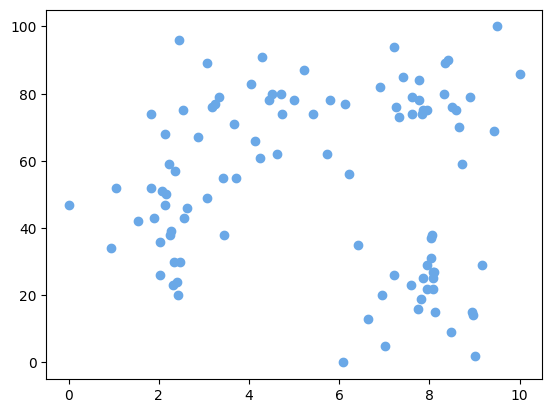

In [18]:
plt.scatter(X[:, 0], X[:, 1], color="#6AA8E7")
plt.show()

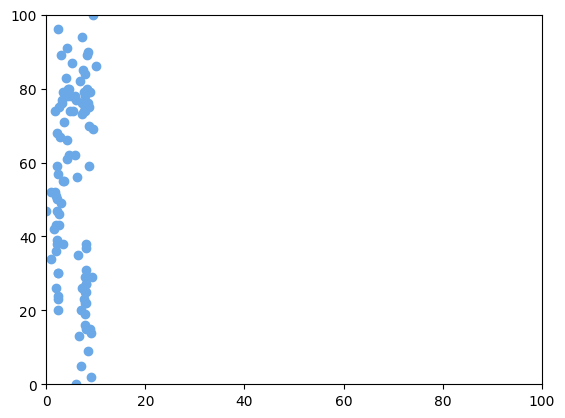

In [19]:
plt.scatter(X[:, 0], X[:, 1], color="#6AA8E7")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trans = scaler.fit_transform(X)
X_trans[:5], X[:5]

(array([[ 0.68729921,  0.73538376],
        [-0.66687438,  0.04198891],
        [-0.77161709,  0.04198891],
        [-0.9100271 ,  1.35173473],
        [-0.8090252 ,  0.96651537]]),
 array([[ 7.33, 73.  ],
        [ 3.71, 55.  ],
        [ 3.43, 55.  ],
        [ 3.06, 89.  ],
        [ 3.33, 79.  ]]))

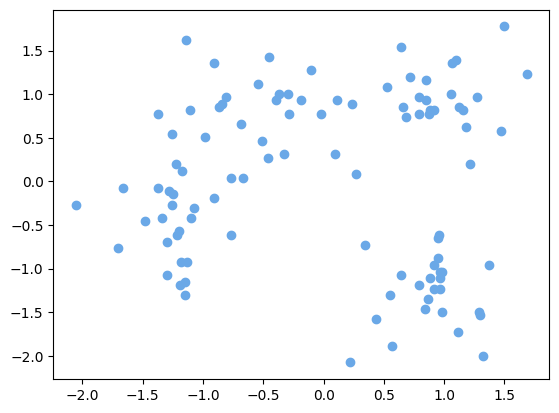

In [21]:
plt.scatter(X_trans[:, 0], X_trans[:, 1], color="#6AA8E7")
plt.show()

In [22]:
def model_kmeans(K):
    import pandas as pd
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=K, random_state=0)

    dataset = pd.read_csv('data/KMeansData.csv')
    X = dataset.iloc[:, [0,1]].values

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_trans = scaler.fit_transform(X)
    kmeans.fit(X_trans)
    
    centers_org = scaler.inverse_transform(kmeans.cluster_centers_)
    return kmeans, X, X_trans, centers_org

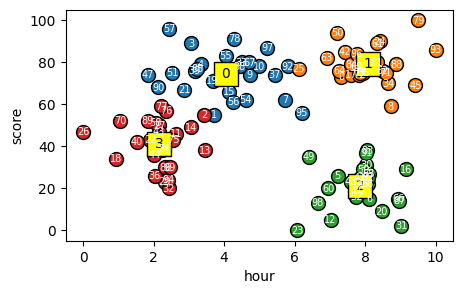

In [23]:
import matplotlib.pyplot as plt
import numpy as np
no = 4
kmeans, X_org, X_trans, centers_org = model_kmeans(no)
y_pred = kmeans.fit_predict(X_trans)

plt.figure(figsize=(5, 3))
for i in range(no):
    index = np.where(y_pred==i)
    x=X_org[index, 0]
    y=X_org[index, 1]
    plt.scatter(x, y, s=100, ec='black')
    cx = centers_org[i, 0]
    cy = centers_org[i, 1]
    plt.scatter(cx, cy, c='yellow', s=300, ec='black', marker='s')
    plt.text(cx, cy, i, ha='center', va='center')
    plt.xlabel('hour')
    plt.ylabel('score')
for idx, x in enumerate(X_org):
    plt.text(x[0], x[1], idx, ha='center', va='center', color='white', size=7)
plt.show()

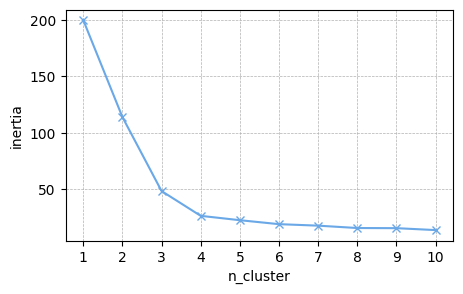

In [24]:
inertia_list=[] #각 점들에서 중심점까지의 거리 제곱의 합
for i in range(1, 11, 1):
    kmeans, X, X_trans, centers_org = model_kmeans(i)
    kmeans.fit(X_trans)
    inertia_list.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
x = list(range(1, 11, 1))
y = inertia_list

plt.figure(figsize=(5, 3))
plt.plot(x, y, color="#6AA8E7", marker='x')
plt.xticks([x for x in range(1, 11, 1)])
plt.grid(True, ls='--', lw=0.5)
plt.xlabel('n_cluster')
plt.ylabel('inertia')
plt.show()

In [1]:
K=4
kmeans = KMeans(n_clusters=K, random_state=0)
kmeans.fit(X_trans)

NameError: name 'KMeans' is not defined

In [ ]:
y_pred = kmeans.fit_predict(X_trans)
y_pred, X[:5]

In [ ]:
dataset['cluster'] = y_pred
dataset.head()

In [ ]:
import numpy as np
index = np.where(y_pred==1)
index


In [ ]:
X[index, 1], X[index, 0]

In [ ]:
for i in range(K):
    index = np.where(y_pred==i)
    print(i, X[index, 0], X[index, 1])

In [ ]:
filt = dataset['cluster']==0
dataset[filt].index

In [ ]:
y_pred

In [ ]:
plt.figure(figsize=(5, 5))
for i in range(K):
    index = np.where(y_pred==i)
    x=X_trans[index, 0]
    y=X_trans[index, 1]
    plt.scatter(x, y)
plt.show()

In [ ]:
centers = kmeans.cluster_centers_
plt.figure(figsize=(5, 5))
for i in range(K):
    index = np.where(y_pred==i)
    x=X_trans[index, 0]
    y=X_trans[index, 1]
    plt.scatter(x, y)
    cx = centers[i, 0]
    cy = centers[i, 1]
    plt.scatter(cx, cy, c='yellow', s=300, ec='black', marker='s')
    plt.text(cx, cy, i, ha='center', va='center')
plt.show()

In [ ]:
X_org = scaler.inverse_transform(X_trans)
X_org[:5]

In [ ]:
centers_org = scaler.inverse_transform(centers)
centers_org

In [ ]:
plt.figure(figsize=(5, 3))
for i in range(3):
    index = np.where(y_pred==i)
    x=X_org[index, 0]
    y=X_org[index, 1]
    plt.scatter(x, y, s=100, ec='black')
    cx = centers_org[i, 0]
    cy = centers_org[i, 1]
    plt.scatter(cx, cy, c='yellow', s=300, ec='black', marker='s')
    plt.text(cx, cy, i, ha='center', va='center')
    plt.xlabel('hour')
    plt.ylabel('score')
for idx, x in enumerate(X_org):
    plt.text(x[0], x[1], idx, ha='center', va='center', color='white', size=7)
plt.show()

In [ ]:
dataset.loc[31, :]

In [ ]:
#KMeans 모델생성
def model_kmeans(K):
    import pandas as pd
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=K, random_state=0)

    dataset = pd.read_csv('data/KMeansData.csv')
    X = dataset.iloc[:, [0,1]].values

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_trans = scaler.fit_transform(X)
    kmeans.fit(X_trans)
    
    centers_org = scaler.inverse_transform(kmeans.cluster_centers_)
    return kmeans, X, X_trans, centers_org

In [ ]:
kmeans, X_org, X_trans, centers_org = model_kmeans(5) 
y_kmeans = kmeans.fit_predict(X_trans)
y_kmeans

In [ ]:
K=4
model, X_org, X_trans, centers_org = model_kmeans(K)
y_pred = model.fit_predict(X_trans)

plt.figure(figsize=(10, 5))
for i in range(K):
    index = np.where(y_pred==i)
    x=X_org[index, 0]
    y=X_org[index, 1]
    plt.scatter(x, y, s=100, ec='black')
    cx = centers_org[i, 0]
    cy = centers_org[i, 1]
    plt.scatter(cx, cy, c='yellow', s=300, ec='black', marker='s')
    plt.text(cx, cy, i, ha='center', va='center')
    plt.xlabel('hour')
    plt.ylabel('score')
for idx, x in enumerate(X_org):
    plt.text(x[0], x[1], idx, ha='center', va='center', color='white', size=7)
plt.show()

In [ ]:
df_stu = pd.read_csv('data/학사관리/학생.csv')

In [ ]:
df_pro = pd.read_csv('data/학사관리/교수.csv')

In [ ]:
stu = list(df_stu['학생이름'])
pro = list(df_pro['교수이름'])
names = stu + pro
print(names)

In [ ]:
df = pd.read_csv('data/KMeansData.csv')
df['name']=''
df.head(2)

In [ ]:
import random
idx = random.randint(0, len(names)-1)
idx, names[idx]

In [ ]:
for i in range(len(df)):
    import random
    idx = random.randint(0, len(names)-1)
    df.loc[i, 'name']=names[idx]
df.tail()

In [ ]:
df.to_csv('data/K-평균.csv', index=False)

In [ ]:
kmeans, X, X_trans, centers_org = model_kmeans(4)
y_pred = kmeans.fit_predict(X_trans)
df['cluster'] = y_pred
df.tail()

In [ ]:
for i in range(4):
    filt = df['cluster']==i
    df2 = df[filt]
    print(f'{i}그룹 {len(df2)}명...........................')
    index = df2.index

    count = 0
    for idx in index:
        print(f'{idx}:{df.loc[idx, "name"]}', end=',')
        count +=1
        if count%10==0: print()
    print()
    print('-' * 100)